In [1]:
## Generally setup
import numpy as np
import os
import os.path as op
import matplotlib.pyplot as plt
from langouEEG import *
from scipy.stats import *
from eeg_microstates3 import *
import pandas as pd
import time
import mne
import pickle
from mne.datasets import sample
from mne.datasets import fetch_fsaverage
from mpl_toolkits.mplot3d import Axes3D  # noqa
from langouMicrostates import *
from IPython.display import clear_output as clear
import logging
# import easyEEG

sample_data_folder = mne.datasets.sample.data_path()
# dataRoot = "/data/home/viscent/Light"
dataRoot = "/work/zhangyq/Light/"


# Download fsaverage files
fs_dir = fetch_fsaverage(verbose=True)
isMale = False
isAll = True
isBlind = False
if not isAll:
    result_dir = op.join(dataRoot,'result','male' if isMale else 'female')
else:
    result_dir = op.join(dataRoot,'result','all')
if isBlind:
    result_dir = op.join(result_dir,'Blind')
subjects_dir = op.dirname(fs_dir)
if not op.exists(result_dir):
    os.mkdir(result_dir)
# The files live in:
subject = 'fsaverage'
trans = 'fsaverage'  # MNE has a built-in fsaverage transformation
src = op.join(fs_dir, 'bem', 'fsaverage-ico-5-src.fif')
bem = op.join(fs_dir, 'bem', 'fsaverage-5120-5120-5120-bem-sol.fif')
print(__doc__)

0 files missing from root.txt in /work/zhangyq/mne_data/MNE-fsaverage-data
0 files missing from bem.txt in /work/zhangyq/mne_data/MNE-fsaverage-data/fsaverage
Automatically created module for IPython interactive environment


In [2]:
%%capture
## Input EEG data and extarct epochs

epochs_4F = dict()
epochs_RF = dict()
epochs_4R = dict()
epochs_RR = dict()
#epochs_all = dict()


# tmin_rest, tmax_rest, tmin_flick,tmax_flick = 40, 60, 15, 30
# tmin_rest, tmax_rest, tmin_flick,tmax_flick = 40, 50, 15, 22
tmin_rest, tmax_rest, tmin_flick,tmax_flick = 5, 25, 5, 25
# tmin_R_flick, tmax_R_flick = 20, 25
# tmin_R_flick, tmax_R_flick = 20, 22
tmin_R_flick, tmax_R_flick = 5, 25

# Total 1-21
# 1-11 and 12-21
epoch_num = 0
for subject_name in range(1,21):
    if not isAll:
        if not (isMale ^ (subject_name in [7,8,11,17])):
            continue
    if subject_name<10:
        subject_name='S0'+str(subject_name)
    else:
        subject_name='S'+str(subject_name)
    with open(dataRoot+'/clean_data_av/'+subject_name+'_clean.lgeeg','rb') as f:
        raw=pickle.load(f)
    events, event_dict=extractEvents(raw)
    picks = mne.pick_types(raw.info, meg=False, eeg=True, stim=False, eog=False,
                        exclude='bads')
    if isBlind:
        epoch_RR,epoch_RF,epoch_4R,epoch_4F = extractEpochsBlind(raw,events,picks, 
        tmin_rest = 60,tmax_rest = 87,tmin_flick = 3,tmax_flick = 30)
    else:
        epoch_RR,epoch_RF,epoch_4R,epoch_4F = extractEpochs_forall(raw,events,picks, 
        tmin_rest = tmin_rest,tmax_rest = tmax_rest,tmin_flick = tmin_flick,tmax_flick = tmax_flick)
        _,epoch_RF,_,_ = extractEpochs_forall(raw,events,picks, 
        tmin_rest = tmin_rest,tmax_rest = tmax_rest,tmin_flick = tmin_R_flick,tmax_flick = tmax_R_flick)
    epochs_4F[subject_name]=epoch_4F
    epochs_RF[subject_name]=epoch_RF
    epochs_RR[subject_name]=epoch_RR
    epochs_4R[subject_name]=epoch_4R
    #epochs_all[epoch_num] = epoch_4R
    #epochs_all[epoch_num+1] = epoch_4F
    #epochs_all[epoch_num+2] = epoch_RF
 
    if not op.exists(os.path.join(dataRoot,'fwd_solution.lgeeg')):
        fwd = mne.make_forward_solution(raw.info, trans=trans, src=src,
                                        bem=bem, eeg=True, mindist=5.0, n_jobs=1)
        print(fwd)
        mne.write_forward_solution(os.path.join(dataRoot,'fwd_solution.lgeeg'),fwd,overwrite=True)
    else:
        fwd = mne.read_forward_solution(os.path.join(dataRoot,'fwd_solution.lgeeg'))
    data_path = sample.data_path()

    picks = mne.pick_types(raw.info, meg=False, eeg=True, stim=False, eog=False,
                        exclude='bads')

    epoch_num += 3
    # Clear output display
    clear()

## Concact epochs
epoch_4F = mne.concatenate_epochs(list(epochs_4F.values()))
epoch_RF = mne.concatenate_epochs(list(epochs_RF.values()))
epoch_4R = mne.concatenate_epochs(list(epochs_4R.values()))
# epoch_all = mne.concatenate_epochs(list(epochs_all.values()))
# mne.epochs.equalize_epoch_counts([epoch_4F, epoch_RF, epoch_RR])

# Clear output display
clear()

Not setting metadata
Not setting metadata
302 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
0 bad epochs dropped
(3020302, 64)


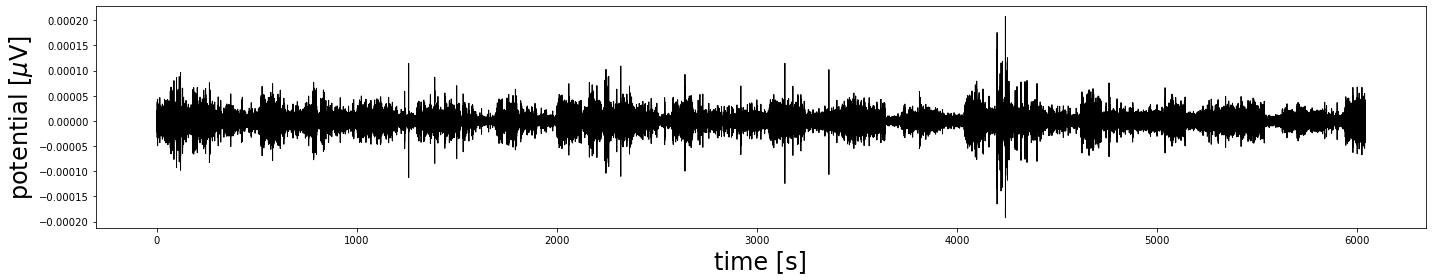

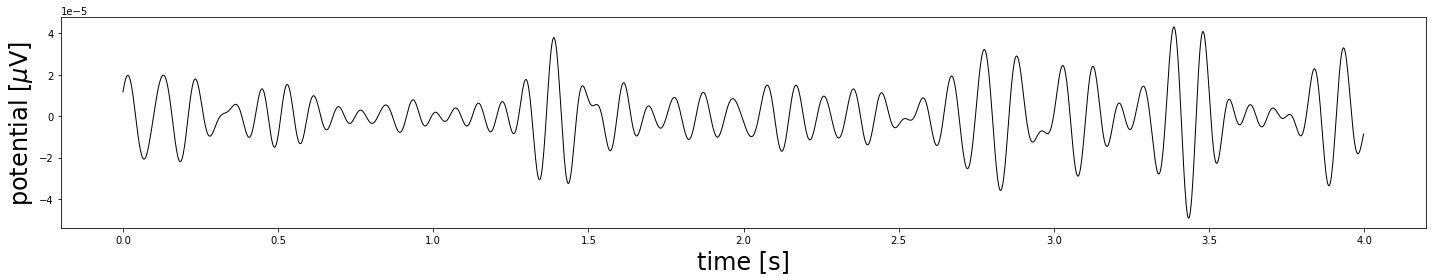

Clustering algorithm: kmeans
[+] Data format for clustering [GFP peaks, channels]: 126860 x 64

[+] Clustering algorithm: mod. K-MEANS.
	K-means run 1/5 converged after 77 iterations.
	K-means run 2/5 converged after 37 iterations.
	K-means run 3/5 converged after 50 iterations.
	K-means run 4/5 converged after 53 iterations.
	K-means run 5/5 converged after 102 iterations.
[+] Computation time: 70.19 sec

[+] Microstate back-fitting:
data_norm:  (3020302, 64)
data_cluster_norm:  (126860, 64)
maps:  (8, 64)

[+] Global explained variance GEV = 0.621
GEV_0: 0.036
GEV_1: 0.068
GEV_2: 0.077
GEV_3: 0.089
GEV_4: 0.069
GEV_5: 0.129
GEV_6: 0.060
GEV_7: 0.093

Empirical symbol distribution (RTT):

p_0 = 0.004
p_1 = 0.210
p_2 = 0.153
p_3 = 0.150
p_4 = 0.211
p_5 = 0.009
p_6 = 0.155
p_7 = 0.108

Empirical transition matrix:

|0.7260.0440.0330.0350.0410.0270.0470.047|
|0.0010.8640.0110.0270.0540.0010.0300.013|
|0.0010.0140.8610.0300.0430.0010.0400.011|
|0.0010.0380.0290.8620.0280.0020.0190.022|
|0

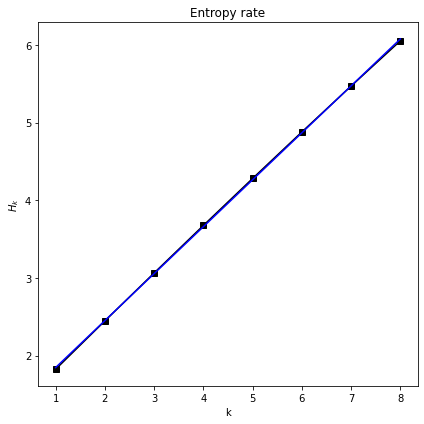


Empirical entropy rate h = 0.60
Theoretical MC entropy rate h = 0.62


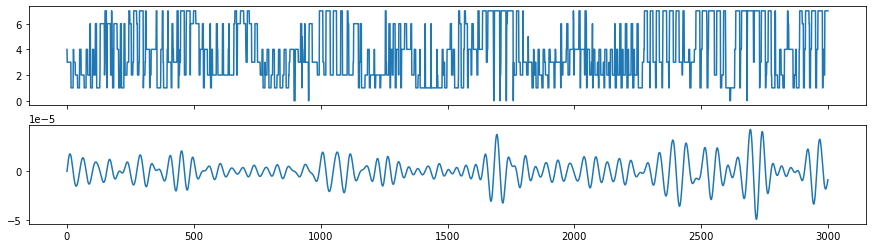

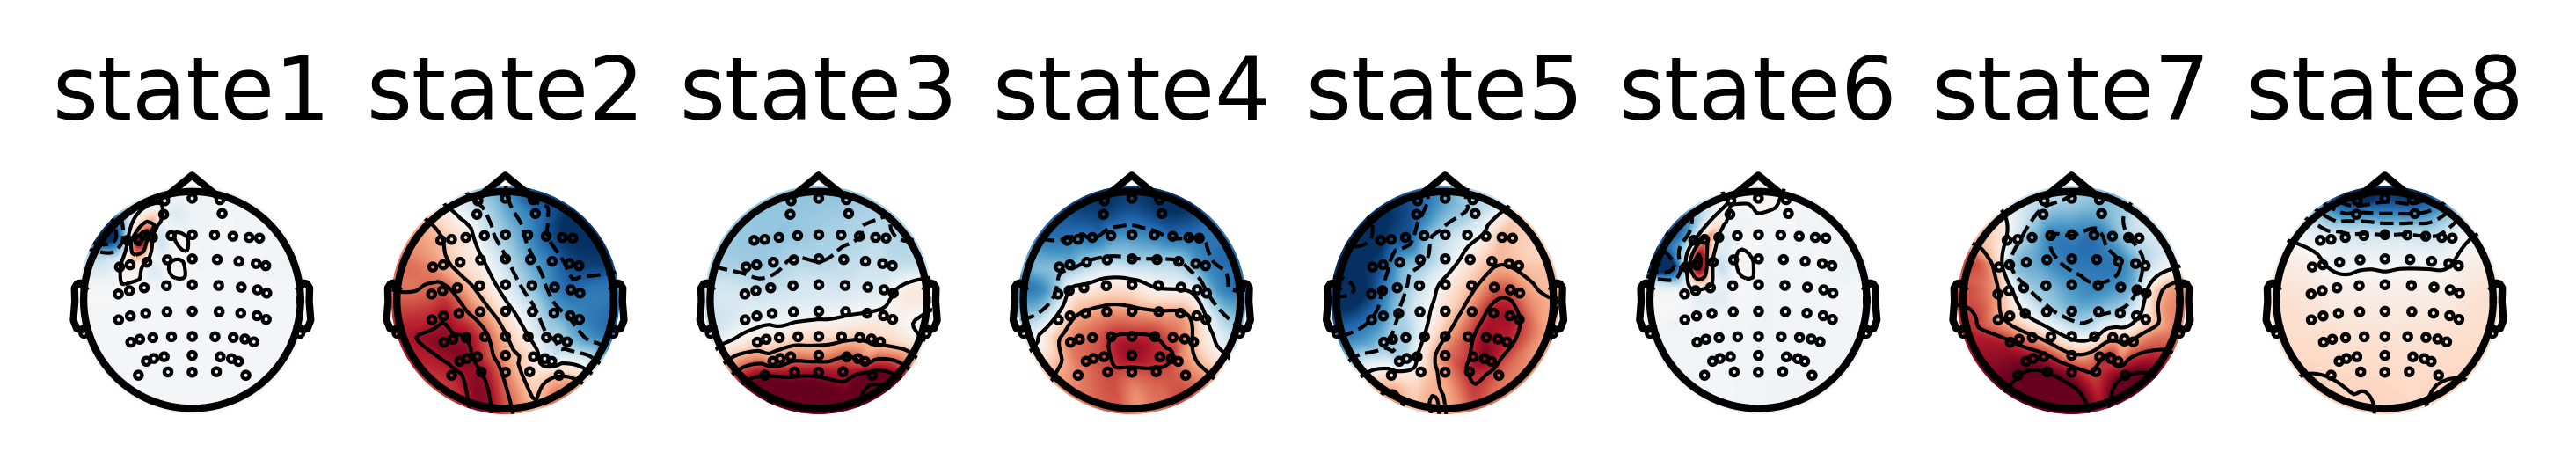

In [3]:
epochs_order = list(epochs_4R.values())
for i in list(epochs_4F.values()):
    epochs_order.append(i)
for i in list(epochs_RF.values()):
    epochs_order.append(i)
epoch_order = mne.concatenate_epochs(epochs_order)

dataRoot = "/work/zhangyq/Light/"

result_dir = dataRoot + "result/microstates"
tm = time.strftime("%Y_%m_%d_%H_%M_%S", time.localtime())
time_augs=[['min_rest','max_rest','min_flick','max_flick','min_random_flick','max_random_flick']
,[tmin_rest, tmax_rest, tmin_flick, tmax_flick, tmin_R_flick, tmax_R_flick]]

# Args to save MS result
save = False
to_save_cache = False
save_log = False

from langouEEG import *
vars_all = display_maps(epoch_order, n_maps=8, save=save, dpi=600, filename='all',
fmt='.png', to_save_cache=to_save_cache, time_augs=time_augs, tm=tm, result_dir=result_dir,
calc_lzc=False, epochs=epoch_order,save_log=save_log, f_lo=8, f_hi=13)

(1050105, 64)


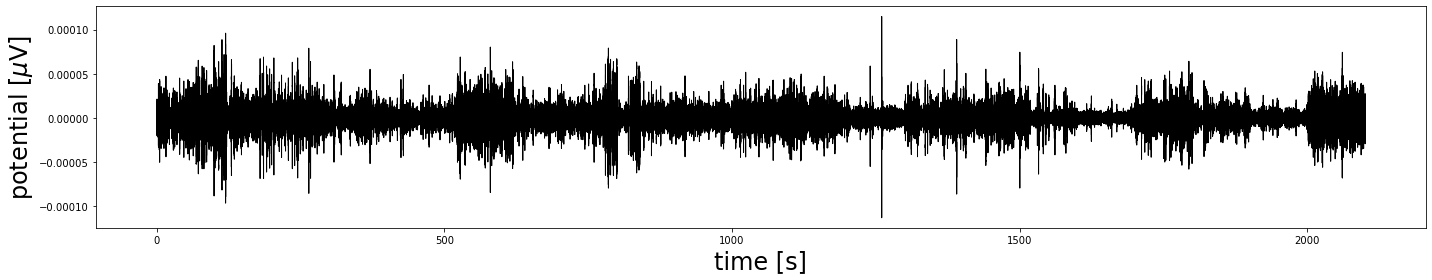

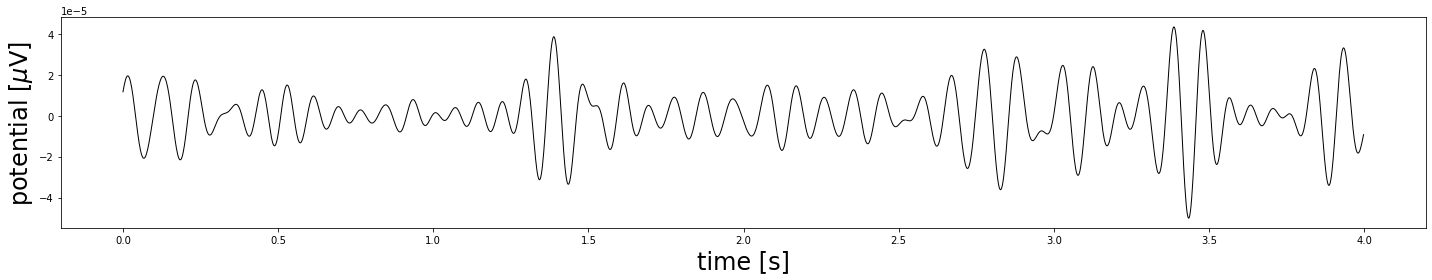

Clustering algorithm: kmeans
[+] Data format for clustering [GFP peaks, channels]: 43959 x 64

[+] Clustering algorithm: mod. K-MEANS.
	K-means run 1/5 converged after 23 iterations.
	K-means run 2/5 converged after 49 iterations.
	K-means run 3/5 converged after 55 iterations.
	K-means run 4/5 converged after 32 iterations.
	K-means run 5/5 converged after 31 iterations.
[+] Computation time: 14.67 sec

[+] Microstate back-fitting:
data_norm:  (1050105, 64)
data_cluster_norm:  (43959, 64)
maps:  (4, 64)

[+] Global explained variance GEV = 0.524
GEV_0: 0.038
GEV_1: 0.179
GEV_2: 0.111
GEV_3: 0.196

Empirical symbol distribution (RTT):

p_0 = 0.010
p_1 = 0.363
p_2 = 0.357
p_3 = 0.270

Empirical transition matrix:

|0.6530.1230.1180.106|
|0.0030.9080.0520.036|
|0.0040.0560.9010.039|
|0.0040.0450.0550.896|

GFP peaks per sec.: 20.93

Global explained variance (GEV) per map:
GEV(ms-0) = 0.04
GEV(ms-1) = 0.18
GEV(ms-2) = 0.11
GEV(ms-3) = 0.20

total GEV: 0.524

Empirical entropy H = 1.14 (m

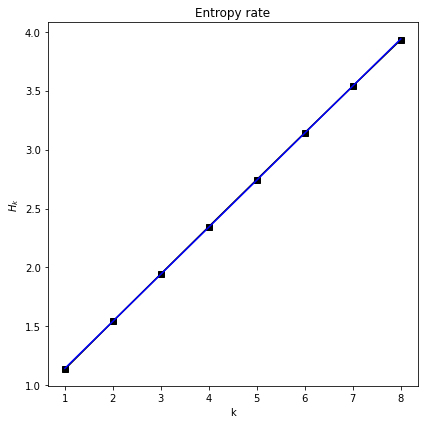


Empirical entropy rate h = 0.40
Theoretical MC entropy rate h = 0.41
(1020102, 64)


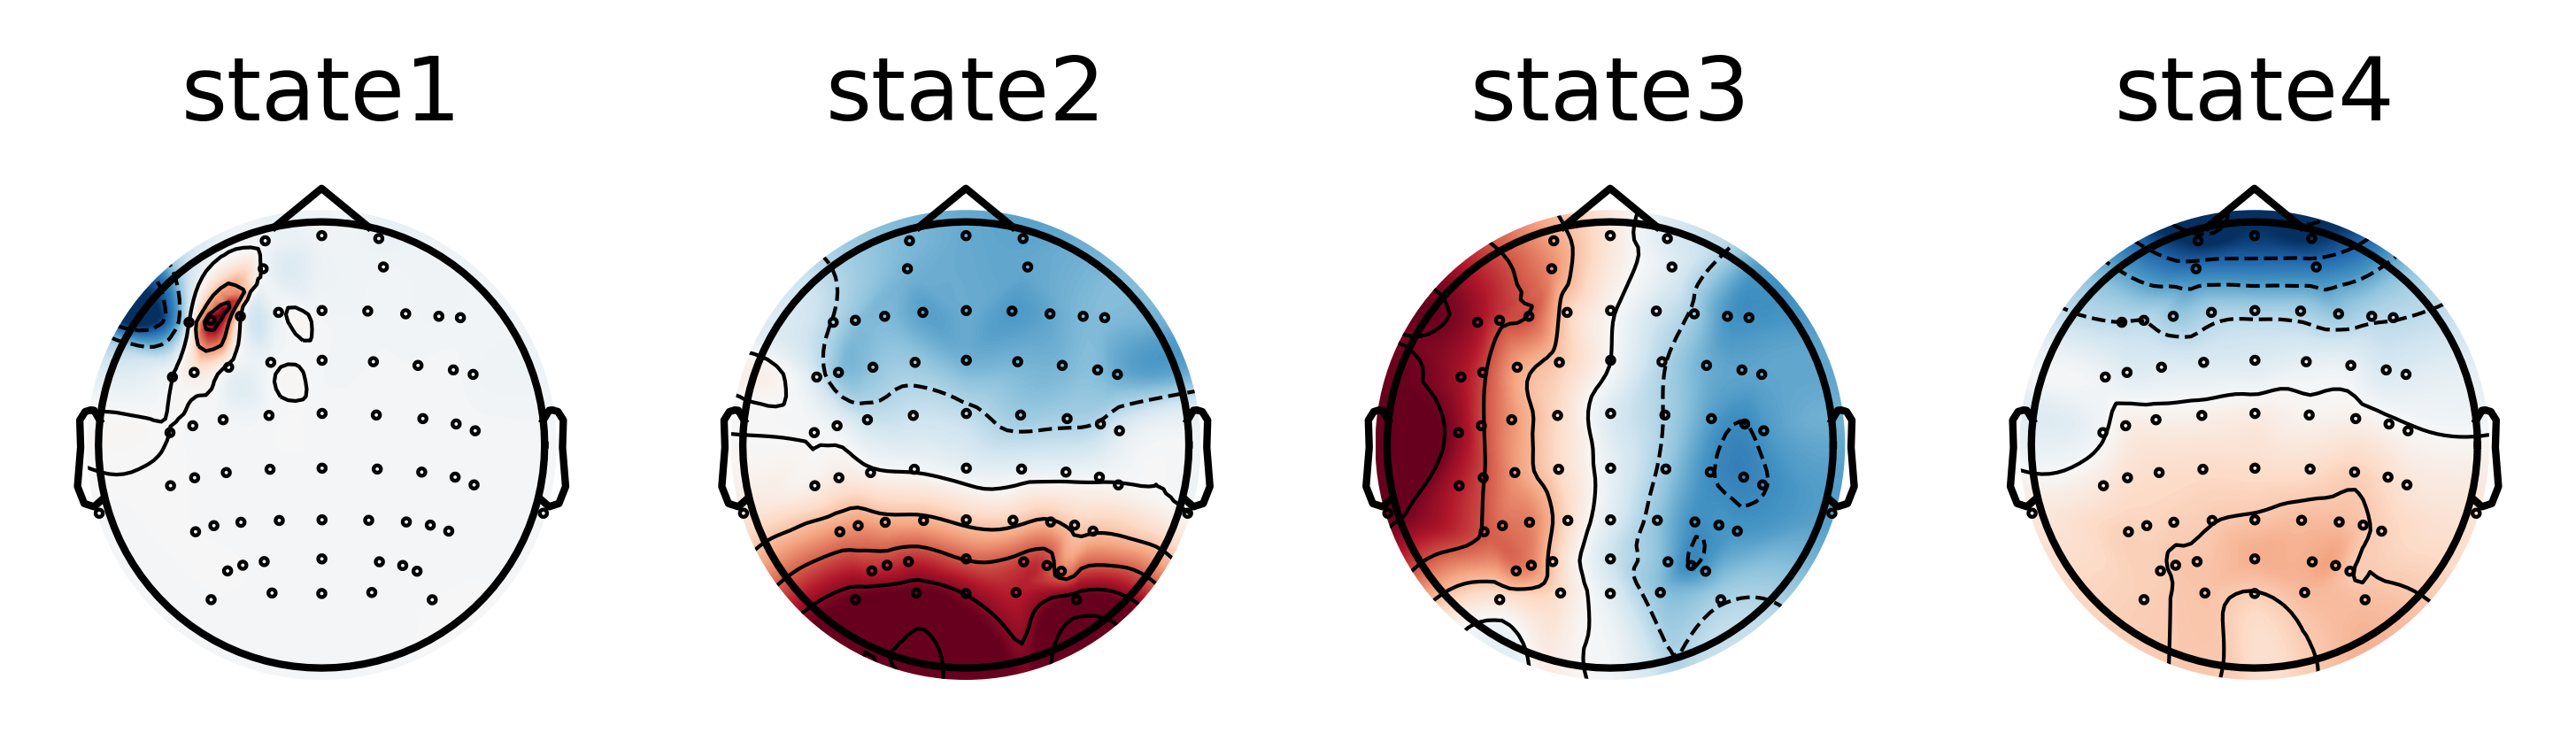

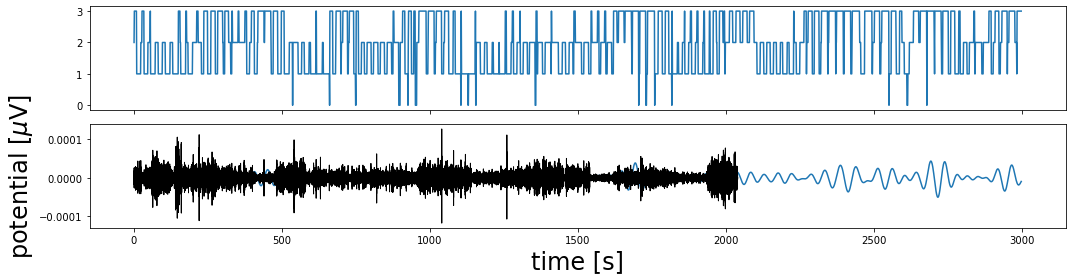

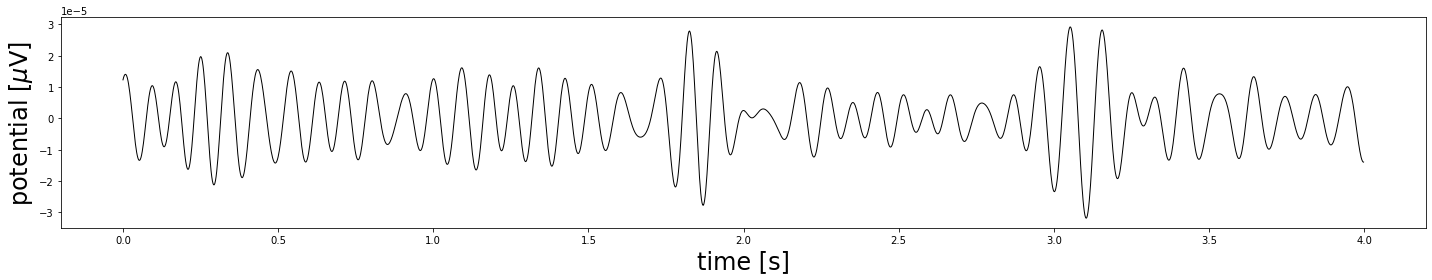

Clustering algorithm: kmeans
[+] Data format for clustering [GFP peaks, channels]: 42969 x 64

[+] Clustering algorithm: mod. K-MEANS.
	K-means run 1/5 converged after 45 iterations.
	K-means run 2/5 converged after 28 iterations.
	K-means run 3/5 converged after 54 iterations.
	K-means run 4/5 converged after 39 iterations.
	K-means run 5/5 converged after 59 iterations.
[+] Computation time: 16.04 sec

[+] Microstate back-fitting:
data_norm:  (1020102, 64)
data_cluster_norm:  (42969, 64)
maps:  (4, 64)

[+] Global explained variance GEV = 0.537
GEV_0: 0.097
GEV_1: 0.145
GEV_2: 0.104
GEV_3: 0.192

Empirical symbol distribution (RTT):

p_0 = 0.267
p_1 = 0.164
p_2 = 0.280
p_3 = 0.289

Empirical transition matrix:

|0.8720.0250.0570.046|
|0.0440.8720.0420.042|
|0.0530.0240.8780.045|
|0.0420.0260.0420.890|

GFP peaks per sec.: 21.06

Global explained variance (GEV) per map:
GEV(ms-0) = 0.10
GEV(ms-1) = 0.14
GEV(ms-2) = 0.10
GEV(ms-3) = 0.19

total GEV: 0.537

Empirical entropy H = 1.36 (m

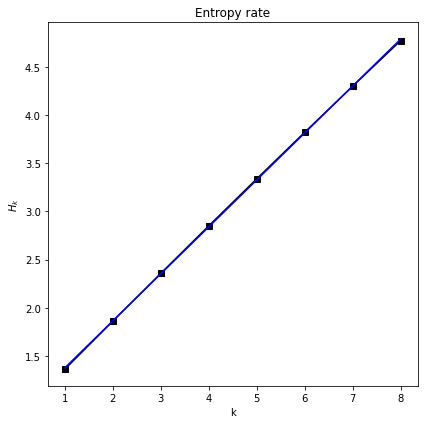


Empirical entropy rate h = 0.49
Theoretical MC entropy rate h = 0.50
(950095, 64)


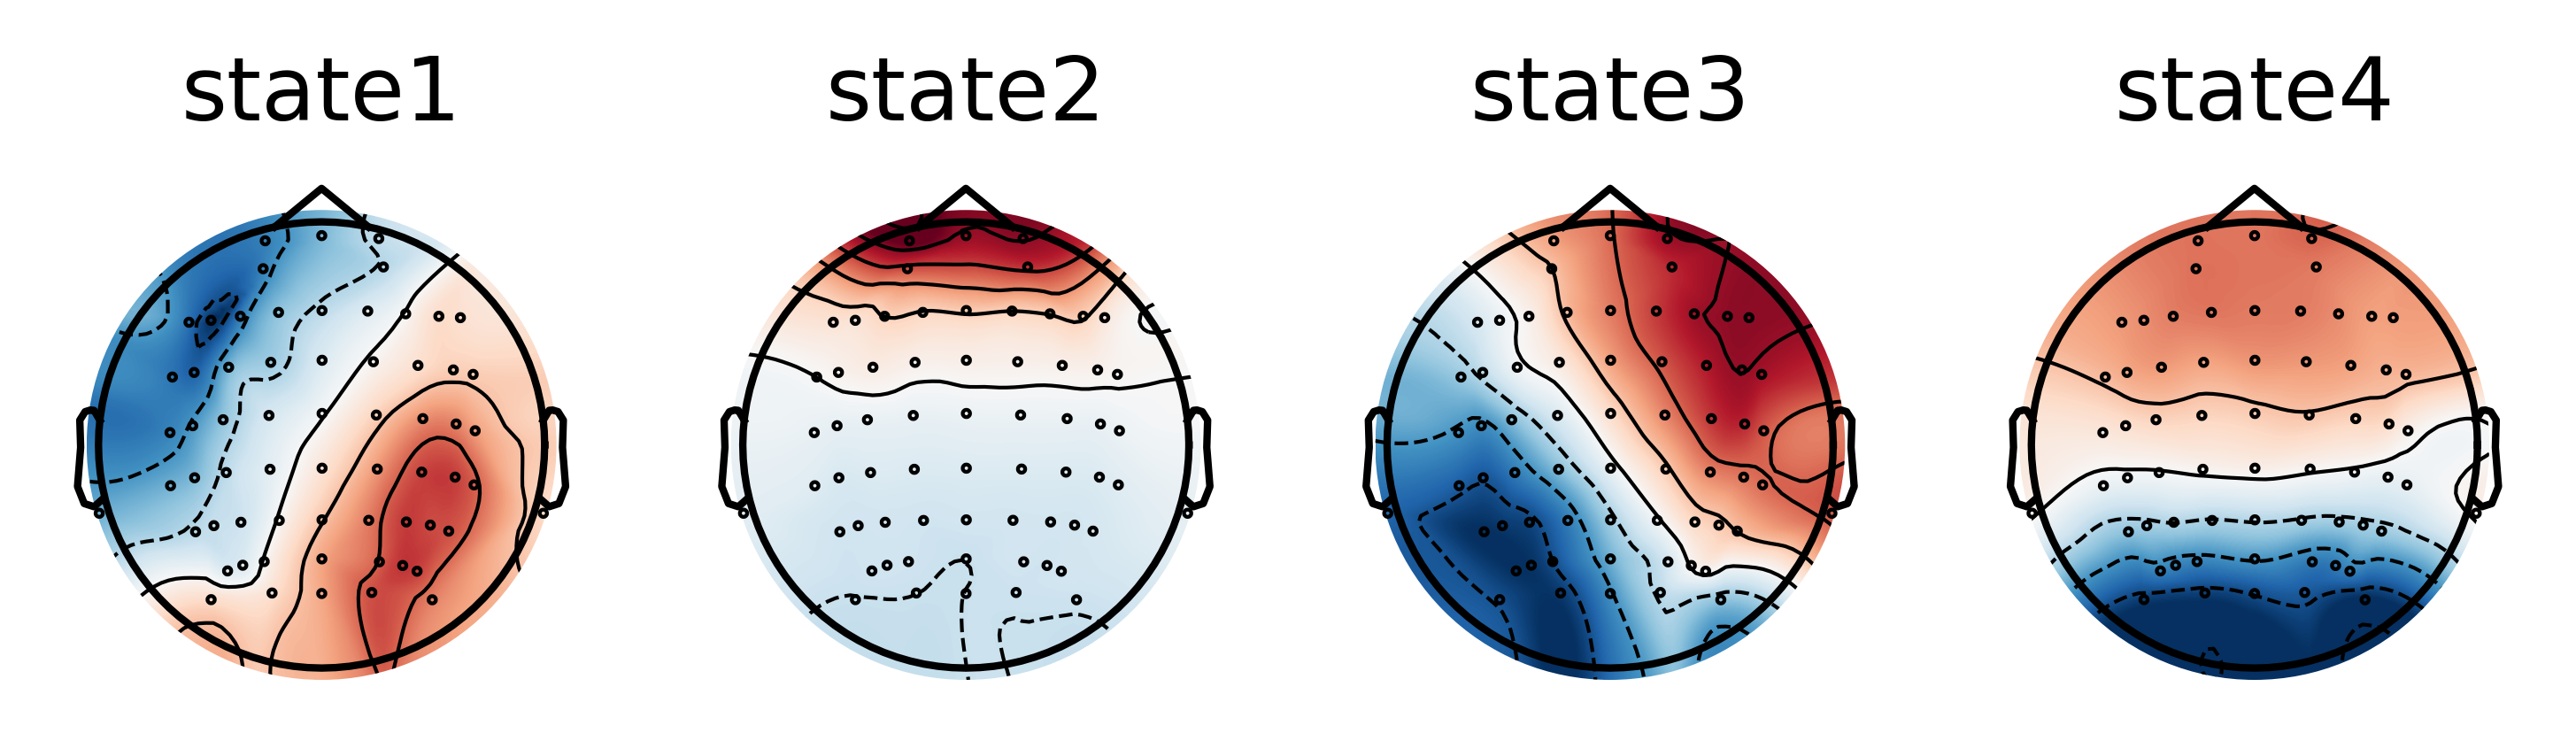

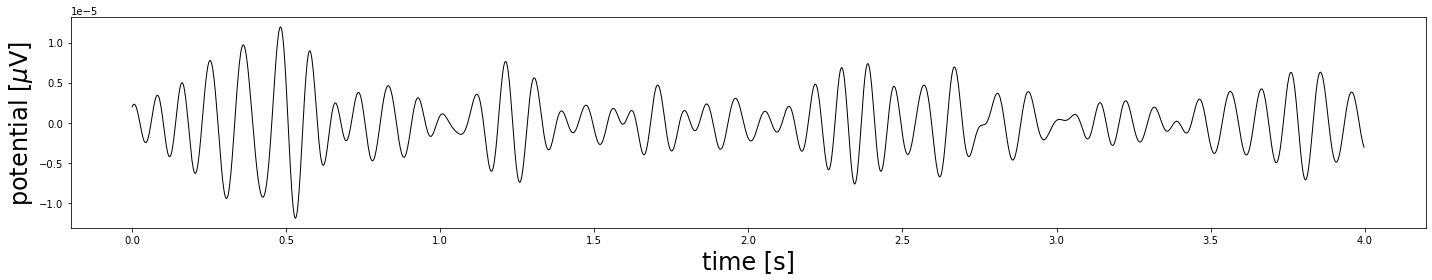

Clustering algorithm: kmeans
[+] Data format for clustering [GFP peaks, channels]: 39934 x 64

[+] Clustering algorithm: mod. K-MEANS.
	K-means run 1/5 converged after 78 iterations.
	K-means run 2/5 converged after 55 iterations.
	K-means run 3/5 converged after 74 iterations.
	K-means run 4/5 converged after 60 iterations.
	K-means run 5/5 converged after 31 iterations.
[+] Computation time: 18.35 sec

[+] Microstate back-fitting:
data_norm:  (950095, 64)
data_cluster_norm:  (39934, 64)
maps:  (4, 64)

[+] Global explained variance GEV = 0.629
GEV_0: 0.150
GEV_1: 0.232
GEV_2: 0.181
GEV_3: 0.066

Empirical symbol distribution (RTT):

p_0 = 0.011
p_1 = 0.030
p_2 = 0.569
p_3 = 0.390

Empirical transition matrix:

|0.7740.0300.1230.073|
|0.0110.7410.1470.101|
|0.0020.0080.9310.059|
|0.0020.0080.0850.904|

GFP peaks per sec.: 21.02

Global explained variance (GEV) per map:
GEV(ms-0) = 0.15
GEV(ms-1) = 0.23
GEV(ms-2) = 0.18
GEV(ms-3) = 0.07

total GEV: 0.629

Empirical entropy H = 0.85 (ma

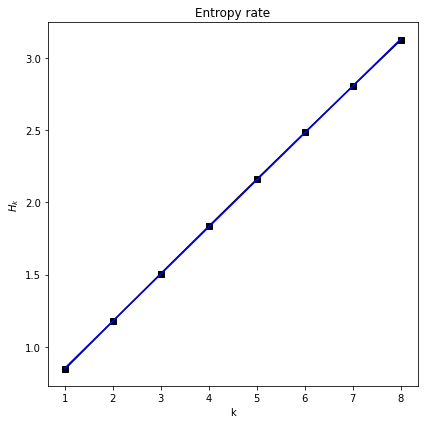


Empirical entropy rate h = 0.33
Theoretical MC entropy rate h = 0.33


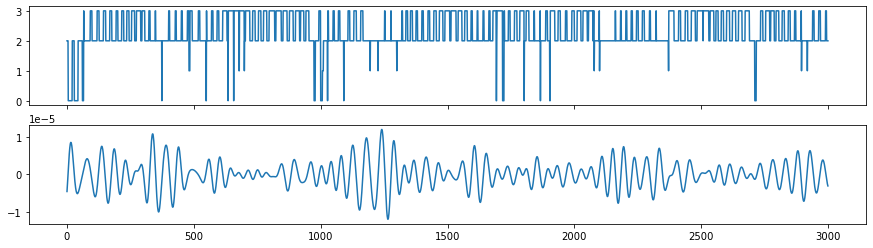

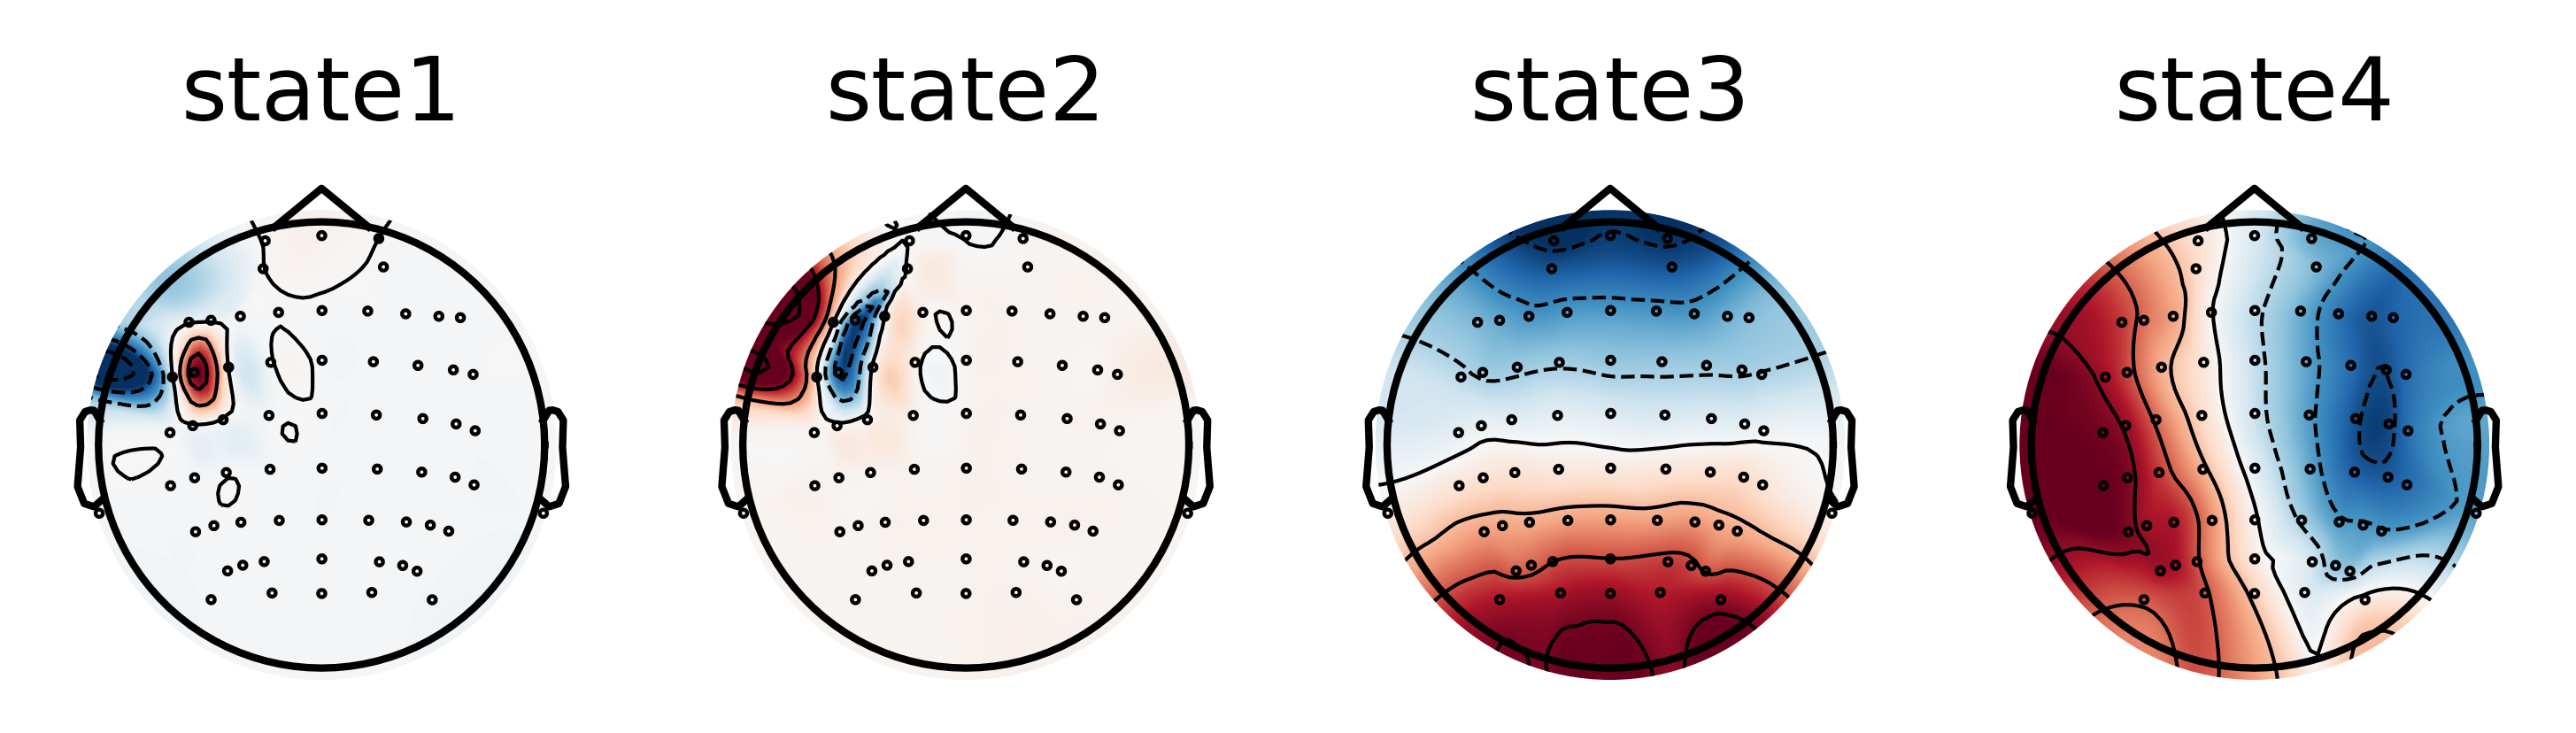

In [4]:
# vars: vars_all, vars_4R, vars_4F, vars_RF
# For vars_: 0:maps, 1:x, 2:gfp_peaks, 3:gev, 4:data, 5:pca1
vars_4R = display_maps(epoch_4R, n_maps=4, save=save, dpi=600, filename='40Hz_rest',
fmt='.png', to_save_cache=to_save_cache, time_augs=time_augs, tm=tm, result_dir=result_dir,
calc_lzc=False, epochs=epochs_4R,save_log=save_log, f_lo=8, f_hi=13)

vars_4F = display_maps(epoch_4F, n_maps=4, save=save, dpi=600, filename='40Hz_flicker', 
fmt='.png', to_save_cache=to_save_cache, time_augs=time_augs, tm=tm, result_dir=result_dir,
calc_lzc=False, epochs=epochs_4F,save_log=save_log,f_lo=8, f_hi=13)

vars_RF = display_maps(epoch_RF, n_maps=4, save=save, dpi=600, filename='random_flicker', 
fmt='.png', to_save_cache=to_save_cache, time_augs=time_augs, tm=tm, result_dir=result_dir,
calc_lzc=False, epochs=epochs_RF,save_log=save_log,f_lo=8, f_hi=13)

In [5]:
print(vars_all[1].shape)
print(vars_4R[1].shape)
print(vars_4F[1].shape)
print(vars_RF[1].shape)

index_rest_end = vars_4R[1].shape[0]
index_40_end = index_rest_end + vars_4F[1].shape[0]
index_random_end = index_40_end + vars_RF[1].shape[0]
x_4R = vars_all[1][0: index_rest_end]
x_4F = vars_all[1][index_rest_end:index_40_end]
x_RF = vars_all[1][index_40_end:index_random_end]


(3020302,)
(1050105,)
(1020102,)
(950095,)


In [6]:
""" seq = [1,2,3,1,1,1,1,1,1,2,2,2,3,3,3,3,3,3]
seq = np.asarray(seq)
def ms_reject(x, reject_time=4, fs=500):
    unit_time = 1/fs
    reject_num = (0.001*reject_time)/unit_time
    state = 0
    count = 0    
    for i in x:
        if state == i :
           count += 1
        else:
            
    return

ms_reject(seq) """


' seq = [1,2,3,1,1,1,1,1,1,2,2,2,3,3,3,3,3,3]\nseq = np.asarray(seq)\ndef ms_reject(x, reject_time=4, fs=500):\n    unit_time = 1/fs\n    reject_num = (0.001*reject_time)/unit_time\n    state = 0\n    count = 0    \n    for i in x:\n        if state == i :\n           count += 1\n        else:\n            \n    return\n\nms_reject(seq) '

In [11]:
""" np.set_printoptions(threshold=np.inf)
print(x_4F) """

[2 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 2 2 2 2 2 2 2 7 7 7 7 7 7 7 7 7 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 4 4 4 1 1 6 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 4 4 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 4 4 1 1 1 1 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 4 4 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 7 7 7 7
 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 7 7 7 7 7 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 6 7 7 7 7 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 6 7 7 7 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 4 4 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 6 6 6 1 1 1
 1 1 2 2 2 2 2 2 2 2 2 2 2 2 6 6 6 6 6 6 6 3 3 3 2 2 2 2 2 2 2 2 2 2 2 6 6
 6 6 6 1 1 1 4 4 4 4 4 4 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 4 4 4
 4 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 4 4 4 2 2 2 2 2 2 2 1 1 1 1
 1 1 1 1 1 1 1 1 4 4 4 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 4 4 4 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 6 6 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 6 6
 4 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 6 6 6 6 6 4 4 4 2 2 2 2 2 2 2 2 2 2 2
 2 2 6 6 6 6 6 6 6 6 6 6 